# Forward encoding model based on Pim Mostert Decoding toolbox



In [1]:
!pwd

/Users/junjieji/Documents/GitHub/master-thesis


In [2]:
import sys
import time as tic
# %matplotlib qt
from scipy.io import loadmat
import numpy as np
import pandas as pd
import mat73

import inspect #path_fun = inspect.getfile(StratifiedKFold)
import matplotlib.pyplot as plt
import mne
import os
import random

from statsmodels.tsa.stattools import coint


In [3]:
path_utils = '/decoding_toolbox_py/helper_funcs' 
sys.path.append(path_utils)

# Variables

In [4]:
''' VARIABLES '''

dataset = 'eeg'

amount_of_subjects = 26

numC = 8

angles = [i * 180./numC for i in range(numC)]

x_labels = np.array(angles)

resample = True # speeds up the procees but showing worse results overall
resample_frequency = 20 # in Hz, original freq is 500Hz

# Loading & preparing orientation data

In [5]:
from toolbox.methods import train_main_ori, read_data

all_epochs, all_rawdata = read_data(amount_of_subjects= amount_of_subjects,
                        task='main',
                        resample=resample,
                        resample_frequency=resample_frequency
                        )
read_st = False
if read_st:
    all_st_rawdata = read_data(task='stim')
    stim_cols = all_st_rawdata[0]['metadata'].columns
    stim_shape = all_st_rawdata[0]['epoch_dat'].shape
ori = ['o1', 'o2', 'o3', 'o4', 'o5', 'o6']

Frequency before: 500.0
Frequency after: 20.0
Frequency before: 500.0
Frequency after: 20.0
Frequency before: 500.0
Frequency after: 20.0
Frequency before: 500.0
Frequency after: 20.0
Frequency before: 500.0
Frequency after: 20.0
Frequency before: 500.0
Frequency after: 20.0
Frequency before: 500.0
Frequency after: 20.0
Frequency before: 500.0
Frequency after: 20.0
Frequency before: 500.0
Frequency after: 20.0
Frequency before: 500.0
Frequency after: 20.0
Frequency before: 500.0
Frequency after: 20.0
Frequency before: 500.0
Frequency after: 20.0
Frequency before: 500.0
Frequency after: 20.0
Frequency before: 500.0
Frequency after: 20.0
Frequency before: 500.0
Frequency after: 20.0
Frequency before: 500.0
Frequency after: 20.0
Frequency before: 500.0
Frequency after: 20.0
Frequency before: 500.0
Frequency after: 20.0
Frequency before: 500.0
Frequency after: 20.0
Frequency before: 500.0
Frequency after: 20.0
Frequency before: 500.0
Frequency after: 20.0
Frequency before: 500.0
Frequency 

In [6]:
time_labels = all_epochs[0].times # The labels are the same for all subjects
main_cols = all_rawdata[0]['metadata'].columns
main_shape = all_rawdata[0]['epoch_dat'].shape
# print(all_rawdata[0]['metadata'][ori[1]])
print(main_shape, main_cols)

(250, 32, 115) Index(['index', 'subj', 'nblock', 'ntrial', 'nrep', 'trial_type', 'cond-1',
       'cond', 'rDV', 'DV', 'resp', 'deci-2', 'deci-1', 'deci', 'corr-1',
       'r_map', 'correct', 'confi', 'RT', 'd1', 'conf_lvl', 'correct-1', 'd2',
       'd3', 'd4', 'd5', 'd6', 'o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'confi-1',
       'conf_lvl-1'],
      dtype='object')


# Procedure for multisubject

In [7]:
prt = all_rawdata[0]['metadata']['o6']
# print(np.unique(prt))
print(np.min(prt), np.max(prt))

0.003 3.14


In [8]:
'''17 min for 1 orientation, estimate 2 hours for all 6 :)'''
'''1 min for 1 ori if resample = True, 6 min for all 6 '''

amount_of_orientations = 6
Xhat_centeredmean = [None]*amount_of_orientations
for i in range(amount_of_orientations):
    print('Working on orientation: ', i+1)
    Xhat_centeredmean[i]= train_main_ori(all_rawdata, use_orientation=i)

Working on orientation:  1
Working on orientation:  2
Working on orientation:  3
Working on orientation:  4
Working on orientation:  5
Working on orientation:  6


In [9]:
print(time_labels)

[-0.5  -0.45 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.    0.05
  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65
  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05  1.1   1.15  1.2   1.25
  1.3   1.35  1.4   1.45  1.5   1.55  1.6   1.65  1.7   1.75  1.8   1.85
  1.9   1.95  2.    2.05  2.1   2.15  2.2   2.25  2.3   2.35  2.4   2.45
  2.5   2.55  2.6   2.65  2.7   2.75  2.8   2.85  2.9   2.95  3.    3.05
  3.1   3.15  3.2   3.25  3.3   3.35  3.4   3.45  3.5   3.55  3.6   3.65
  3.7   3.75  3.8   3.85  3.9   3.95  4.    4.05  4.1   4.15  4.2   4.25
  4.3   4.35  4.4   4.45  4.5   4.55  4.6   4.65  4.7   4.75  4.8   4.85
  4.9   4.95  5.    5.05  5.1   5.15  5.2 ]


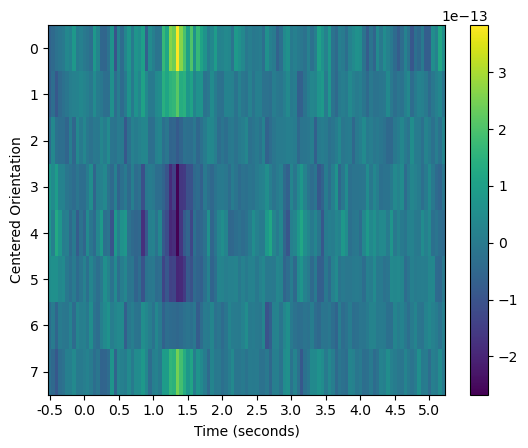

In [10]:
import matplotlib.pyplot as plt

plt.imshow(Xhat_centeredmean[0], aspect='auto')
plt.colorbar()
# Set the X-axis tick locations and labels
step = int(resample_frequency/2)  # Display every x labels
plt.xticks(range(0, len(time_labels), step), time_labels[::step])
plt.xlabel('Time (seconds)')
plt.ylabel('Centered Orientation')
plt.show()



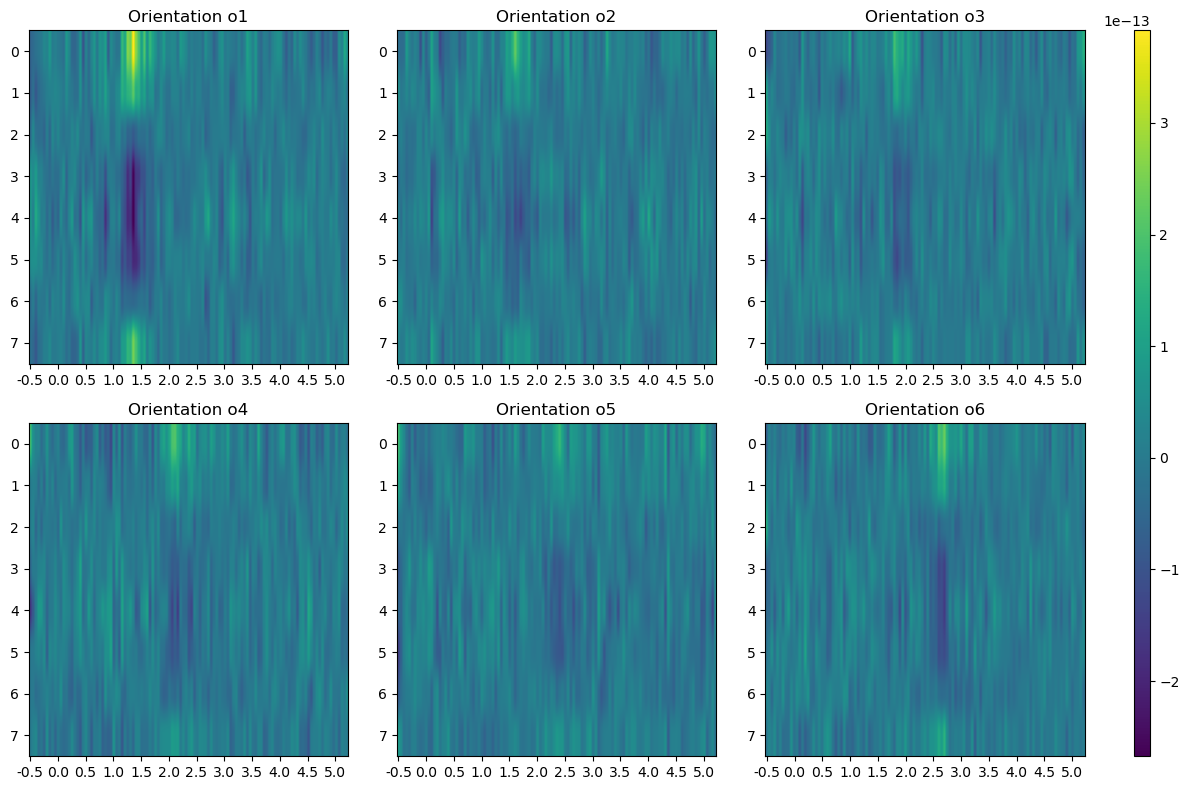

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 0.05])

# Compute the global minimum and maximum values for the color scale
min_val = np.min(Xhat_centeredmean)
max_val = np.max(Xhat_centeredmean)

for i in range(6):
    ax = fig.add_subplot(gs[i // 3, i % 3])
    im = ax.imshow(Xhat_centeredmean[i], 
                   aspect='auto', 
                   vmin=min_val, vmax=max_val)
    ax.set_title(f'Orientation o{i+1}')
    ax.set_xticks(range(0, len(time_labels), step))
    step = 10  # Display every x labels
    ax.set_xticklabels(time_labels[::step])

# Add a colorbar outside the plot
cbar_ax = fig.add_subplot(gs[:, -1])
cbar = fig.colorbar(im, cax=cbar_ax)

plt.tight_layout()
plt.show()


In [12]:
print(np.shape(Xhat_centeredmean))
Zhat = np.mean(Xhat_centeredmean,axis=0)
print(np.shape(Zhat))


(6, 8, 115)
(8, 115)


### Mean for all the values

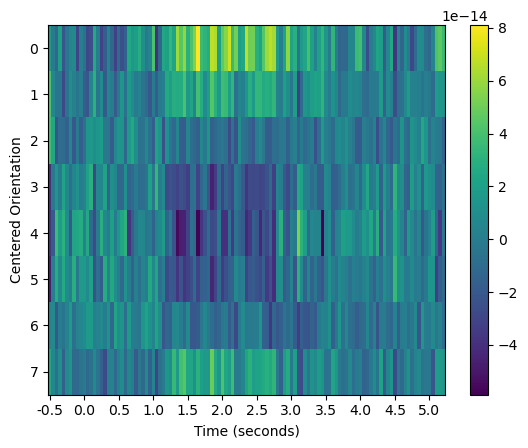

In [13]:
plt.imshow(Zhat, aspect='auto')
plt.colorbar()
# Set the X-axis tick locations and labels
step = 10  # Display every x labels
plt.xticks(range(0, len(time_labels), step), time_labels[::step])
plt.xlabel('Time (seconds)')
plt.ylabel('Centered Orientation')
plt.show()


using timepoints (needed for later experiments)

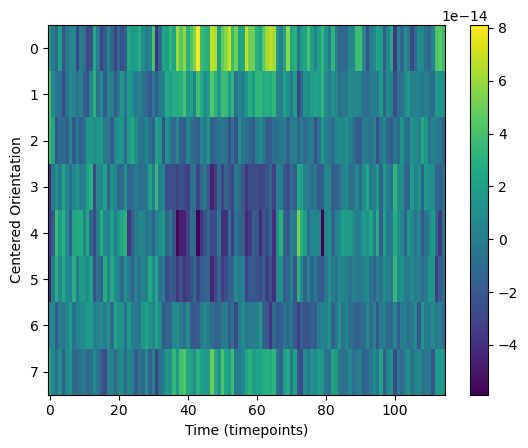

In [14]:
plt.imshow(Zhat, aspect='auto')
plt.colorbar()
plt.xlabel('Time (timepoints)')
plt.ylabel('Centered Orientation')
plt.show()

In [17]:
print(30*25, 70*25, 115*25)

750 1750 2875


# Using repetitions

In [15]:
stop here

SyntaxError: invalid syntax (4067800170.py, line 1)

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

max_abs = np.max(np.abs(Xhat_centeredmean_rep))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

im0 = axes[0].imshow(Xhat_centeredmean_rep[0], aspect='auto', vmin=-max_abs, vmax=max_abs)
axes[0].set_title('Repetition 0')

im1 = axes[1].imshow(Xhat_centeredmean_rep[1], aspect='auto', vmin=-max_abs, vmax=max_abs)
axes[1].set_title('Repetition 1')

im2 = axes[2].imshow(Xhat_centeredmean_rep[2], aspect='auto', vmin=-max_abs, vmax=max_abs)
axes[2].set_title('Repetition 2')

divider = make_axes_locatable(axes[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax)

plt.tight_layout()
plt.show()



NameError: name 'Xhat_centeredmean_rep' is not defined

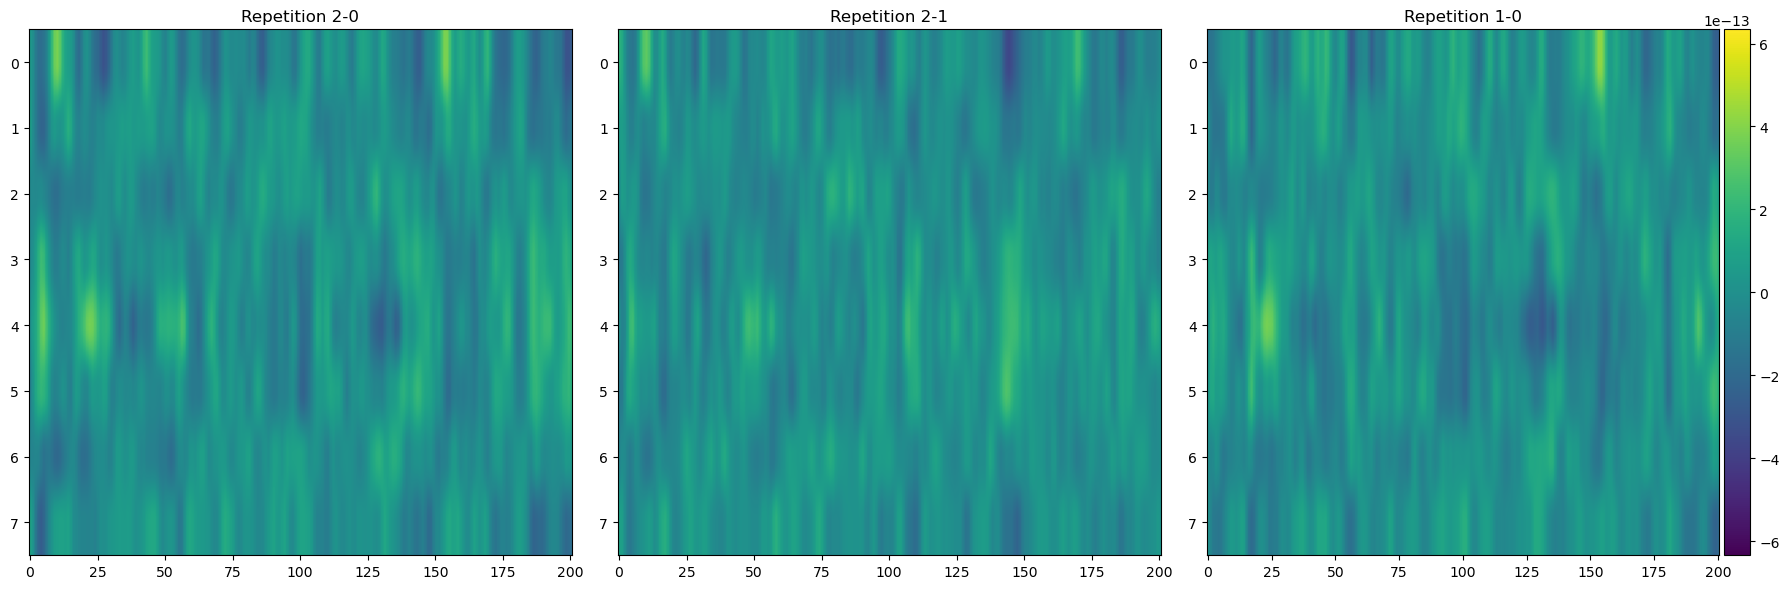

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

im0 = axes[0].imshow(Xhat_centeredmean_rep[2] - Xhat_centeredmean_rep[0], aspect='auto', vmin=-max_abs, vmax=max_abs)
axes[0].set_title('Repetition 2-0')

im1 = axes[1].imshow(Xhat_centeredmean_rep[2] - Xhat_centeredmean_rep[1], aspect='auto', vmin=-max_abs, vmax=max_abs)
axes[1].set_title('Repetition 2-1')

im2 = axes[2].imshow(Xhat_centeredmean_rep[1] - Xhat_centeredmean_rep[0], aspect='auto', vmin=-max_abs, vmax=max_abs)
axes[2].set_title('Repetition 1-0')

divider = make_axes_locatable(axes[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im2, cax=cax)

plt.tight_layout()
plt.show()


In [ ]:
stophere

NameError: name 'stophere' is not defined

In [ ]:


'''

Cluster based simulation, buscarlo en mne

'''

'''

Clasificar reponse (quizas no sale)

clasificar actividad motora (si que sale)

6 min de loc
main task
6 min de loc

MAIN TASK son 6 stimulos, long ts. 

'''


https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

# crossmodal